In [1]:
import sys
# script specific requirement in readme
sys.path.insert(0,"/home/keshav/courses/master_thesis/Graph-Transformer/U2GNN_pytorch/log_uniform")
from U2GNN_pytorch import util
from U2GNN_pytorch import train_utils

In [29]:
graph, num_classes = util.load_data("IMDBBINARY",True)

loading data
dataset file chosen is /home/keshav/courses/master_thesis/Graph-Transformer/dataset/IMDBBINARY/IMDBBINARY.txt
# classes: 2
# maximum node tag: 65
# data: 1000


In [30]:
vars(graph[0])

{'label': 0,
 'g': <networkx.classes.graph.Graph at 0x7f7a9d606e10>,
 'node_tags': [5, 19, 5, 5, 5, 5, 8, 11, 8, 11, 8, 8, 8, 12, 6, 3, 6, 3, 4, 6],
 'neighbors': [[2, 4, 5, 9, 10],
  [2, 6, 8, 12, 14, 17, 18, 19],
  [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
  [2, 6, 12, 19, 11, 16],
  [0, 2, 5, 9, 10],
  [0, 2, 4, 9, 10],
  [2, 1, 3, 8, 11, 12, 14, 16, 17, 18, 19],
  [2, 13, 15],
  [2, 1, 6, 12, 14, 17, 18, 19],
  [0, 2, 4, 5, 10],
  [0, 2, 4, 5, 9],
  [2, 6, 12, 19, 3, 16],
  [2, 1, 6, 8, 3, 11, 14, 16, 17, 18, 19],
  [2, 7, 15],
  [2, 1, 6, 8, 12, 17, 18, 19],
  [2, 19, 7, 13],
  [2, 6, 12, 19, 3, 11],
  [2, 1, 6, 8, 12, 14, 18, 19],
  [2, 1, 6, 8, 12, 14, 17, 19],
  [2, 1, 6, 8, 12, 14, 17, 18, 3, 11, 15, 16]],
 'node_features': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..

In [31]:
args={'device':'cuda'}
args['batch_size']=4
args['dataset']="IMDBBINARY"
args['num_epochs']=50
args['num_neighbors']=16
args= util.Namespace(**args)
graph_pool = train_utils.get_graphpool(graph,args)

In [32]:
graph_pool.shape

torch.Size([1000, 19773])

In [33]:
len(graph)

1000

In [34]:
print(list(int(indice) for indice in graph_pool._indices()[0]))


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 1

In [35]:
graph_indices = graph_pool._indices()[0]
batch_nodes = train_utils.Batch_Loader(graph,graph_indices,args)

In [36]:
import numpy as np
selected_idx = np.random.permutation(len(graph))[:args.batch_size]


In [37]:
selected_idx

array([571, 703, 352,  96])

In [40]:
X_concat, input_x, input_y = train_utils.get_batch_data(graph, graph_indices, selected_idx, args)
print(X_concat.shape)
print(input_x)
print(input_y)

torch.Size([101, 65])
tensor([[  0,  11,   5,  ...,  11,  11,  11],
        [  1,   4,   9,  ...,   9,  10,  10],
        [  2,   3,   1,  ...,   4,   1,   1],
        ...,
        [ 98,  95,  92,  ...,  93,  90,  94],
        [ 99,  94,  92,  ...,  89, 100,  94],
        [100,  98,  99,  ...,  89,  92,  93]], device='cuda:0')
tensor([11390, 11391, 11392, 11393, 11394, 11395, 11396, 11397, 11398, 11399,
        11400, 11401, 11402, 13980, 13981, 13982, 13983, 13984, 13985, 13986,
        13987, 13988, 13989, 13990, 13991, 13992, 13993, 13994, 13995,  6980,
         6981,  6982,  6983,  6984,  6985,  6986,  6987,  6988,  6989,  6990,
         6991,  6992,  6993,  6994,  6995,  6996,  6997,  6998,  6999,  7000,
         7001,  7002,  7003,  7004,  7005,  7006,  7007,  7008,  7009,  7010,
         7011,  7012,  7013,  7014,  7015,  7016,  7017,  7018,  7019,  7020,
         7021,  7022,  7023,  7024,  7025,  7026,  7027,  7028,  7029,  7030,
         7031,  7032,  7033,  7034,  7035,  703

In [39]:
def get_Adj_matrix(batch_graph):
    edge_mat_list = []
    start_idx = [0]
    for i, graph in enumerate(batch_graph):
        
        start_idx.append(start_idx[i] + len(graph.g))
        edge_mat_list.append(graph.edge_mat + start_idx[i])
        print(edge_mat_list)

    Adj_block_idx = np.concatenate(edge_mat_list, 1)
    # Adj_block_elem = np.ones(Adj_block_idx.shape[1])
    print(Adj_block_idx)
    Adj_block_idx_row = Adj_block_idx[0,:]
    Adj_block_idx_cl = Adj_block_idx[1,:]

    return Adj_block_idx_row, Adj_block_idx_cl

In [14]:
get_Adj_matrix([graph[0],graph[0]])

[array([[ 0,  0,  0,  0,  0,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  4,  4,  4,  5,  5,  9,  1,  1,  1,
         1,  1,  1,  1,  6,  6,  6,  6,  6,  6,  6,  6,  6,  8,  8,  8,
         8,  8, 12, 12, 12, 12, 12, 12, 12, 14, 14, 14, 17, 17, 18, 19,
        19, 19, 19,  3,  3,  7,  7, 11, 13,  2,  4,  5,  9, 10,  1,  3,
         4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
         5,  9, 10,  9, 10, 10,  6,  8, 12, 14, 17, 18, 19,  3,  8, 11,
        12, 14, 16, 17, 18, 19, 12, 14, 17, 18, 19,  3, 11, 14, 16, 17,
        18, 19, 17, 18, 19, 18, 19, 19,  3, 11, 15, 16, 11, 16, 13, 15,
        16, 15],
       [ 2,  4,  5,  9, 10,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
        13, 14, 15, 16, 17, 18, 19,  5,  9, 10,  9, 10, 10,  6,  8, 12,
        14, 17, 18, 19,  3,  8, 11, 12, 14, 16, 17, 18, 19, 12, 14, 17,
        18, 19,  3, 11, 14, 16, 17, 18, 19, 17, 18, 19, 18, 19, 19,  3,
        11, 15, 16, 11, 16, 13, 15, 16, 15,  0

(array([ 0,  0,  0,  0,  0,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  4,  4,  4,  5,  5,  9,  1,  1,  1,  1,  1,
         1,  1,  6,  6,  6,  6,  6,  6,  6,  6,  6,  8,  8,  8,  8,  8, 12,
        12, 12, 12, 12, 12, 12, 14, 14, 14, 17, 17, 18, 19, 19, 19, 19,  3,
         3,  7,  7, 11, 13,  2,  4,  5,  9, 10,  1,  3,  4,  5,  6,  7,  8,
         9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  5,  9, 10,  9, 10, 10,
         6,  8, 12, 14, 17, 18, 19,  3,  8, 11, 12, 14, 16, 17, 18, 19, 12,
        14, 17, 18, 19,  3, 11, 14, 16, 17, 18, 19, 17, 18, 19, 18, 19, 19,
         3, 11, 15, 16, 11, 16, 13, 15, 16, 15, 20, 20, 20, 20, 20, 22, 22,
        22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 24,
        24, 24, 25, 25, 29, 21, 21, 21, 21, 21, 21, 21, 26, 26, 26, 26, 26,
        26, 26, 26, 26, 28, 28, 28, 28, 28, 32, 32, 32, 32, 32, 32, 32, 34,
        34, 34, 37, 37, 38, 39, 39, 39, 39, 23, 23, 27, 27, 31, 33, 22, 24,
        25, 

In [15]:
input_x.shape

torch.Size([20, 17])

In [16]:
input_y

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19], device='cuda:0')

In [17]:
graph_indices

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       device='cuda:0')

In [18]:
input_x

tensor([[ 0,  5, 10,  5,  4,  9,  5,  9,  4,  4,  2,  4,  4,  2,  2,  4,  9],
        [ 1, 19, 18, 17,  6,  6, 17,  8,  2, 14, 12, 17,  2, 12, 17,  2,  6],
        [ 2, 18,  9, 11,  5,  8,  3,  4,  3, 14, 10,  5, 12,  7,  1, 13,  4],
        [ 3,  2,  2, 19,  2, 12,  6,  6, 19, 12, 12, 19,  6,  2, 11, 12,  6],
        [ 4,  9,  0, 10,  9, 10,  2,  5,  9,  2, 10,  9,  9,  0,  2,  9,  5],
        [ 5,  9,  2, 10,  2,  2,  2, 10, 10,  0,  2,  2,  2,  2,  9, 10,  2],
        [ 6,  2, 17, 17, 17,  8,  1, 12, 14, 12,  8,  3, 16, 19, 17, 19,  2],
        [ 7, 15, 15, 13, 15, 15, 13,  2, 15,  2, 13, 15, 13,  2, 13, 13,  2],
        [ 8, 12,  1,  2, 19, 19,  6, 19, 19,  6, 12, 12, 14, 12, 12, 19, 17],
        [ 9,  2, 10,  0, 10,  2,  5,  5,  0,  2,  4,  0,  5,  4,  0,  0, 10],
        [10,  2,  5,  2,  0,  2,  4,  4,  4,  2,  5,  4,  5,  2,  2,  5,  5],
        [11,  6, 19, 16, 12,  6, 12,  3,  6,  6, 12,  2, 12,  2, 12, 12, 12],
        [12, 18, 19,  3,  1,  2,  2, 17, 17, 18,  3,  1,  6, 14,

In [19]:
import torch.nn.functional as F
import torch

In [20]:
input_this=F.embedding(input_x, X_concat).to('cuda')
print(input_this.shape)

torch.Size([20, 17, 65])


In [21]:
encoder_layer = torch.nn.TransformerEncoderLayer(d_model=65, nhead=1)
transformer_encoder = torch.nn.TransformerEncoder(encoder_layer, num_layers=6)
src = torch.rand(57, 17, 65)
out = transformer_encoder(src)

In [22]:
out.shape

torch.Size([57, 17, 65])

In [23]:
a = torch.arange(20).reshape(5,2,2)
a.shape

torch.Size([5, 2, 2])

In [24]:
torch.split(out, split_size_or_sections=1, dim=1)[0].squeeze(dim=1).shape

torch.Size([57, 65])

In [25]:
input_y

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19], device='cuda:0')

In [26]:
vocab_size=graph_pool.size()[1]
print(vocab_size)

20


In [27]:
from U2GNN_pytorch.sampled_softmax import  *



In [28]:
ss= SampledSoftmax(vocab_size, 200, 65, 'cuda')

In [29]:
from log_uniform import LogUniformSampler

In [30]:
sampler = LogUniformSampler(vocab_size)

In [31]:
samples = sampler.sample(10, input_y.data.cpu().numpy())

In [32]:
len(samples[0])

10

In [33]:
len(samples[1])

20

In [34]:
len(input_y)

20

In [35]:
samples[1]

[0.9955958724021912,
 0.9502809643745422,
 0.8756226897239685,
 0.7977973222732544,
 0.7265993356704712,
 0.6641656756401062,
 0.6100979447364807,
 0.5633209347724915,
 0.5227004885673523,
 0.48722851276397705,
 0.4560597836971283,
 0.42850103974342346,
 0.4039875864982605,
 0.38205915689468384,
 0.36233943700790405,
 0.3445189893245697,
 0.3283417820930481,
 0.3135947585105896,
 0.3000991940498352,
 0.2877044975757599]

In [36]:
samples[2]

[0.9955958724021912,
 0.9502809643745422,
 0.8756226897239685,
 0.7977973222732544,
 0.7265993356704712,
 0.6641656756401062,
 0.6100979447364807,
 0.5227004885673523,
 0.4560597836971283,
 0.38205915689468384]

In [37]:
samples[1]

[0.9955958724021912,
 0.9502809643745422,
 0.8756226897239685,
 0.7977973222732544,
 0.7265993356704712,
 0.6641656756401062,
 0.6100979447364807,
 0.5633209347724915,
 0.5227004885673523,
 0.48722851276397705,
 0.4560597836971283,
 0.42850103974342346,
 0.4039875864982605,
 0.38205915689468384,
 0.36233943700790405,
 0.3445189893245697,
 0.3283417820930481,
 0.3135947585105896,
 0.3000991940498352,
 0.2877044975757599]

In [38]:
torch.exp(torch.matmul(inputs, torch.t(sample_weights)))

NameError: name 'inputs' is not defined

In [ ]:
print('hello')

In [39]:
from U2GNN_pytorch.pytorch_U2GNN_UnSup import TransformerU2GNN
model = TransformerU2GNN(feature_dim_size=graph[0].node_features.shape[1], ff_hidden_size=1024,
                        dropout=0.5, num_self_att_layers=2,
                        vocab_size=vocab_size, sampled_num=10,
                        num_U2GNN_layers=2, device=args.device).to(args.device)


In [40]:
output_this = model(X_concat, input_x, input_y)

In [41]:
output_this.shape

torch.Size([20])

In [42]:
model.ss.weight.shape

torch.Size([20, 130])

In [43]:
input_x.shape

torch.Size([20, 17])

In [54]:
X_concat.shape

torch.Size([71, 65])

In [55]:
input_x

tensor([[ 0,  2, 12,  ..., 11, 12, 11],
        [ 1,  0, 12,  ...,  6, 11,  0],
        [ 2, 12, 15,  ...,  1,  6, 11],
        ...,
        [68, 62, 60,  ..., 60, 65, 69],
        [69, 59, 68,  ..., 65, 60, 62],
        [70, 65, 65,  ..., 61, 58, 63]], device='cuda:0')

In [56]:
input_y

tensor([ 9479,  9480,  9481,  9482,  9483,  9484,  9485,  9486,  9487,  9488,
         9489,  9490,  9491,  9492,  9493,  9494,  9495,  6405,  6406,  6407,
         6408,  6409,  6410,  6411,  6412,  6413,  6414,  6415,  6416,  6417,
         6418, 13403, 13404, 13405, 13406, 13407, 13408, 13409, 13410, 13411,
        13412, 13413, 13414, 13415, 13416, 13417, 13418, 13419, 13420, 13421,
        13422, 13423, 13424, 13425, 13426, 13427, 13428, 13429, 11959, 11960,
        11961, 11962, 11963, 11964, 11965, 11966, 11967, 11968, 11969, 11970,
        11971], device='cuda:0')

In [2]:
import dgl
import torch 
args={}
args['dataset']="cora"
args['batch_size']=100
args['num_epochs']=50
args['num_neighbors']=16
args = util.Namespace(**args)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("using device {} for pytorch computation".format(device))
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(123)
args.update(device=device)

using device cuda for pytorch computation


Using backend: pytorch


In [3]:
from dgl.data import CoraDataset

In [5]:
data = CoraDataset()

In [22]:
g = dgl.DGLGraph(data.graph)
g.readonly()

print ( [f for f in next(iter(dgl.contrib.sampling.sampler.NeighborSampler(g,20,2,seed_nodes=0)))])

TypeError: 'NodeFlow' object is not iterable

In [21]:
data[0].ndata['train_mask'][0] + data[0].ndata['train_mask'][1]

tensor(True)

In [26]:
torch.tensor(0.0)

tensor(0.)

In [5]:
def get_input_generator(args):
      # load and preprocess dataset
    if args.dataset == 'cora':
        data = CoraGraphDataset()
    elif args.dataset == 'citeseer':
        data = CiteseerGraphDataset()
    elif args.dataset == 'pubmed':
        data = PubmedGraphDataset()
    elif args.dataset == 'PPIDataset':
        data = PPIDataset()
    else:
        raise ValueError('Unknown dataset: {}'.format(args.dataset))

    g = data[0]
    if args.device == 'cuda':
        cuda = False
    else:
        cuda = True
        g = g.int().to(args.device)

    features = g.ndata['feat']
    labels = g.ndata['label']
    print(data[0].etypes)
    print(len(labels))
    train_mask = g.ndata['train_mask']
    print(sum(train_mask))
    val_mask = g.ndata['val_mask']
    test_mask = g.ndata['test_mask']
    train_mask = ~ (val_mask | test_mask)
    print(sum(train_mask))
    num_feats = features.shape[1]
    n_classes = data.num_classes
    n_edges = data._g.number_of_edges()
    print("""----Data statistics------'
      #Edges %d
      #Classes %d
      #Train samples %d
      #Val samples %d
      #Test samples %d""" %
          (n_edges, n_classes,
           train_mask.int().sum().item(),
           val_mask.int().sum().item(),
           test_mask.int().sum().item()))

    # remove self loop
    g = dgl.remove_self_loop(g)
    n_edges = g.number_of_edges()
    
    
    nx_g = data[0].to_networkx()
    return nx_g, features, labels, train_mask, val_mask, test_mask

In [19]:
data = get_input_generator(args)

Loading from cache failed, re-processing.
Finished data loading and preprocessing.
  NumNodes: 2708
  NumEdges: 10556
  NumFeats: 1433
  NumClasses: 7
  NumTrainingSamples: 140
  NumValidationSamples: 500
  NumTestSamples: 1000
Done saving data into cached files.
['_E']
2708
tensor(140, device='cuda:0')
tensor(1208, device='cuda:0')
----Data statistics------'
      #Edges 10556
      #Classes 7
      #Train samples 1208
      #Val samples 500
      #Test samples 1000


In [20]:
data[0].neighbors(0)

In [124]:
data = get_input_generator(train_utils.Namespace(**{'dataset':'pubmed','gpu':0}))

Loading from cache failed, re-processing.
Finished data loading and preprocessing.
  NumNodes: 19717
  NumEdges: 88651
  NumFeats: 500
  NumClasses: 3
  NumTrainingSamples: 60
  NumValidationSamples: 500
  NumTestSamples: 1000
Done saving data into cached files.
['_E']
19717
tensor(60, device='cuda:0')
tensor(18217, device='cuda:0')
----Data statistics------'
      #Edges 88651
      #Classes 3
      #Train samples 18217
      #Val samples 500
      #Test samples 1000


In [29]:
def get_batch_data_node(graphs, features, train_idx, args):
    '''
    returns:
    X_concat: concatenated features of all the selected graphs
    input_x: neighbor matrix #num_nodes X # num neighbours + 1 
    input_y: 1D Tensor of where the nodes of selected_graph are, in the sparse graph matrix.
    '''
    X_concat = features[train_idx]
    input_neighbors = []
    for val in train_idx:
        value = val.item()
        neighbors_list = [n for n in graphs.neighbors(value)]
        if(neighbors_list):
            input_neighbors.append([value]+list(np.random.choice(neighbors_list, args.num_neighbors, replace=True)))
        else:
            input_neighbors.append([value for _ in range(args.num_neighbors + 1)])
    input_x = np.array(input_neighbors)
    input_x = torch.from_numpy(input_x).to(args.device)
    input_y = torch.from_numpy(train_idx).to(args.device)
    return X_concat, input_x, input_y
    

In [34]:
import numpy as np
class Batch_Loader_node_classification(object):
    def __init__(self,args):
        init_object = get_input_generator(args)
        self.graph = init_object[0]
        self.graph, self.features, self.label, self.train_mask, self.val_mask, self.test_mask = init_object
        self.args=args
    def __call__(self):
        train_idx = select_bs_indices_from_mask(self.train_mask, args.batch_size).to('cpu').numpy()
        
        X_concat, input_x, input_y = get_batch_data_node(self.graph, self.features, train_idx, self.args)
        return X_concat, input_x, input_y
    

def select_bs_indices_from_mask(boolean_mask,bs):
    all_mask_idx = torch.where(boolean_mask==True)[0]
    selected_idx = np.random.permutation(len(all_mask_idx))[:bs]
    all_mask_idx[selected_idx]
    return all_mask_idx[selected_idx]




In [40]:
sum(data[0])

3665278

In [35]:
loader = Batch_Loader_node_classification(args)

Loading from cache failed, re-processing.
Finished data loading and preprocessing.
  NumNodes: 2708
  NumEdges: 10556
  NumFeats: 1433
  NumClasses: 7
  NumTrainingSamples: 140
  NumValidationSamples: 500
  NumTestSamples: 1000
Done saving data into cached files.
['_E']
2708
tensor(140, device='cuda:0')
tensor(1208, device='cuda:0')
----Data statistics------'
      #Edges 10556
      #Classes 7
      #Train samples 1208
      #Val samples 500
      #Test samples 1000


In [36]:
X_concat, input_x, input_y = loader()

In [39]:
input_y.shape

torch.Size([100])

In [1]:
from U2GNN_pytorch import data_utils

[ 25 184 149  71  35  31  26 132  92  69 108  33 135 195  87 126 154 131
 180  75 166  41  24 153  39  54  61 155 106  99 147 123 187  34   0  57
  67 190 110  85   7 157 103 144 138 117  70  52 198 136  98  20  82 162
  58 146 137  59  13  10  12 169  95  47 185  81  30   9   5  27 124  83
  48   2  96 163 181 151 193 100]
[ True False  True False False  True False  True False  True  True False
  True  True False False False False False False  True False False False
  True  True  True  True False False  True  True False  True  True  True
 False False False  True False  True False False False False False  True
  True False False False  True False  True False False  True  True  True
 False  True False False False False False  True False  True  True  True
 False False False  True False False False False False  True  True  True
 False  True False  True False False False False  True False False  True
  True False  True  True  True False False  True False False  True False
  True False  Tru

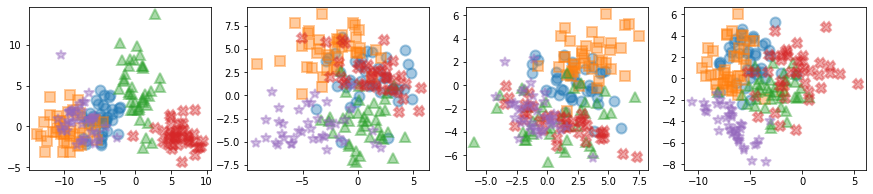

In [2]:
result = data_utils.generate_synthetic_dataset()

In [5]:
import torch

In [11]:
result[1].transpose(1,2).shape

torch.Size([4, 2, 200])